In [1]:
import boto3
import json
from boto3 import client
from boto3.session import Session

In [2]:
#aws sqs topic queue url
queue_url='SQS_QUEUE_URL'

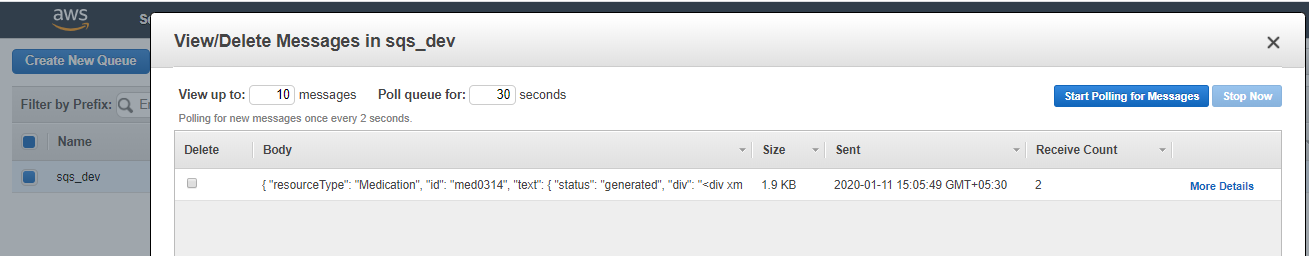

In [13]:
from IPython.display import Image
Image(filename='Annotation 2020-01-11 151035.png')

In [3]:
#aws access and secret key
AWS_ACCESS_KEY_ID='AWS_ACCESS_KEY_ID'
AWS_SECRET_ACCESS_KEY='AWS_SECRET_ACCESS_KEY'

In [4]:
# @get_messages_from_queue: connect to sqs and fetch the messages
def get_messages_from_queue(queue_url):
    #connect sqs using boto3
    sqs_client = boto3.client('sqs')
    msgs = sqs_client.receive_message(QueueUrl=queue_url,AttributeNames=['All'], MaxNumberOfMessages=10)
    return msgs['Messages']

In [5]:
#@get_comprehand_info: method detect the medical entities in your text using aws comprehand
def get_comprehand_info(text):
    #connect comprehend using boto3
    client = boto3.client(service_name='comprehend',aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY,region_name='ap-southeast-1')
    result = client.detect_entities(Text= text,LanguageCode='en')
    entities = result['Entities'];
    for entity in entities:
        print('Entity', entity)

In [12]:
msgs=get_messages_from_queue(queue_url)
for msg in msgs:
    message=msg["Body"]
    message = json.loads(message)
    #print(type(message))
    for p in message['code']['coding']:
        print(p['display'])
        print('-----------------------------------')
        text=str(p['display'])
        get_comprehand_info(text)

Alprazolam 0.25mg Oral Tablet
-----------------------------------
('Entity', {u'Text': u'Alprazolam', u'Score': 0.9604079127311707, u'Type': u'ORGANIZATION', u'BeginOffset': 0, u'EndOffset': 10})
('Entity', {u'Text': u'0.25mg', u'Score': 0.9999991655349731, u'Type': u'QUANTITY', u'BeginOffset': 11, u'EndOffset': 17})
